dimensions: (1798, 2405, 3)
Time taken to extract RGB values: 1.9765877920000037 seconds
red size: 4324190
green size: 4324190
blue size: 4324190
         red  green  blue  scaled_color_red  scaled_color_green  \
0        122    179   248          2.351285            3.108973   
1        122    179   248          2.351285            3.108973   
2        122    179   248          2.351285            3.108973   
3        122    179   248          2.351285            3.108973   
4        122    179   248          2.351285            3.108973   
...      ...    ...   ...               ...                 ...   
4324185   43     54    48          0.828732            0.937902   
4324186   37     48    42          0.713095            0.833691   
4324187   36     42    38          0.693822            0.729480   
4324188   34     39    35          0.655276            0.677374   
4324189   30     32    31          0.578185            0.555794   

         scaled_color_blue  
0                 3.

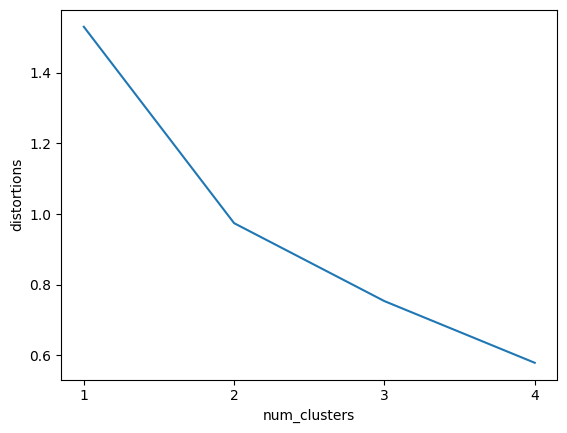

In [2]:
# Importing necessary libraries
import matplotlib.image as img
import pandas as pd
from scipy.cluster.vq import whiten, kmeans
import matplotlib.pyplot as plt
import seaborn as sns
from time import perf_counter

# Read the image and print dimensions
image = img.imread('me.jpg')  # Make sure 'me.jpg' is in the same directory
print('dimensions:', image.shape)

# Store RGB values of all pixels in lists r, g, and b
r = []
g = []
b = []

start = perf_counter()
# Iterate over each pixel in the image
for row in image:
    for temp_r, temp_g, temp_b in row:  # Assuming image has 3 channels (RGB)
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

end = perf_counter()
print(f"Time taken to extract RGB values: {end - start} seconds")
# Print the size of these lists
print("red size:", len(r))
print("green size:", len(g))
print("blue size:", len(b))
# # Save as DataFrame
colour_df = pd.DataFrame({'red': r, 'green': g, 'blue': b})
# Scaling the values

start = perf_counter()

colour_df['scaled_color_red'] = whiten(colour_df['red'])
colour_df['scaled_color_green'] = whiten(colour_df['green'])
colour_df['scaled_color_blue'] = whiten(colour_df['blue'])
print(colour_df)

end = perf_counter()

print(f"Time taken to scale RGB values: {end - start} seconds")

# # Preparing data to construct elbow plot.
distortions = []
num_clusters = range(1, 5)  # range of cluster sizes

# Create a list of distortions from the kmeans function


for i in num_clusters:
    start = perf_counter()

    cluster_centers, distortion = kmeans(colour_df[['scaled_color_red',
                                                    'scaled_color_blue',
                                                    'scaled_color_green']], i)
    
    end = perf_counter()
    print(f"Time taken to cluster for {i} clusters: {end - start} seconds")
    distortions.append(distortion)
 
start = perf_counter()
# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters,
                           'distortions': distortions})
 
# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)

end = perf_counter()

print(f"Time taken to plot elbow plot: {end - start} seconds")
plt.show()

In [ ]:
Elbow Plot points to 2 clusters which indicates there are two dominant colours in the image.

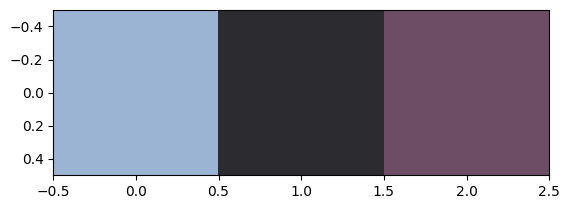

In [4]:
cluster_centers, _ = kmeans(colour_df[['scaled_color_red',
									'scaled_color_blue',
									'scaled_color_green']], 3)

dominant_colors = []

# Get standard deviations of each color
red_std, green_std, blue_std = colour_df[['red',
										'green',
										'blue']].std()

for cluster_center in cluster_centers:
	red_scaled, green_scaled, blue_scaled = cluster_center

	# Convert each standardized value to scaled value
	dominant_colors.append((
		red_scaled * red_std / 255,
		green_scaled * green_std / 255,
		blue_scaled * blue_std / 255
	))

# Display colors of cluster centers
plt.imshow([dominant_colors])
plt.show()
